> # 구종의 다양함이 주는 영향

## 1. Statcast Data

In [131]:
from pybaseball import statcast

### datatime 자료형으로 년/월/일 리스트를 만듬

In [126]:
dt = pd.date_range("20180101", periods = 365)

In [127]:
import datetime
dt_st = dt.strftime('%Y-%m-%d')
dt_list = list(dt_st)

### 각 일자별로 statcast 데이터 받음

for i in dt_list:
    data = []
    data = statcast(i, i)
    del data['index']
    data.to_csv('D://statcast//savant_{}{}{}.csv'.format(i[:4], i[5:7], i[8:10]), index = False)

dt_list = dt_list[:30]

### 필요한 부분 병합 (전체)

In [128]:
j = 1

for i in dt_list:
    
    if i == dt_list[0]:
        data = pd.read_csv('D://statcast//savant_{}{}{}.csv'.format(i[:4], i[5:7], i[8:10]))
        continue
    else:
        da = pd.read_csv('D://statcast//savant_{}{}{}.csv'.format(i[:4], i[5:7], i[8:10]))
        data = pd.concat([data, da])

    j += 1
    
    if j == len(dt_list):
        print('done.')
        
    elif j % 10 == 0:
        print('{}{}{} merged'.format(i[:4], i[5:7], i[8:10]))        

20180110 merged
20180120 merged
20180130 merged
20180209 merged
20180219 merged
20180301 merged
20180311 merged
20180321 merged
20180331 merged
20180410 merged
20180420 merged
20180430 merged
20180510 merged
20180520 merged
20180530 merged
20180609 merged
20180619 merged
20180629 merged
20180709 merged
20180719 merged
20180729 merged
20180808 merged
20180818 merged
20180828 merged
20180907 merged
20180917 merged
20180927 merged
20181007 merged
20181017 merged
20181027 merged
20181106 merged
20181116 merged
20181126 merged
20181206 merged
20181216 merged
20181226 merged
done.


In [129]:
len(data)

731207

In [13]:
data.to_csv('D://statcast//savant.csv', index = False)

NameError: name 'data' is not defined

In [16]:
data = pd.read_csv('D://statcast//savant.csv')

In [17]:
data.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,SI,2018-03-29,96.7,-1.3857,6.1136,Jeurys Familia,657557.0,544727.0,field_out,hit_into_play,...,9.0,4.0,4.0,9.0,4.0,9.0,4.0,9.0,Standard,Standard
1,SI,2018-03-29,96.0,-1.3302,6.1877,Jeurys Familia,657557.0,544727.0,NaN,blocked_ball,...,9.0,4.0,4.0,9.0,4.0,9.0,4.0,9.0,Standard,Standard
2,FF,2018-03-29,98.1,-1.3381,5.9711,Jeurys Familia,425877.0,544727.0,walk,ball,...,9.0,4.0,4.0,9.0,4.0,9.0,4.0,9.0,Strategic,Standard
3,FF,2018-03-29,97.4,-1.1546,5.9254,Jeurys Familia,425877.0,544727.0,NaN,ball,...,9.0,4.0,4.0,9.0,4.0,9.0,4.0,9.0,Standard,Standard
4,FF,2018-03-29,97.1,-1.1802,6.0784,Jeurys Familia,425877.0,544727.0,NaN,ball,...,9.0,4.0,4.0,9.0,4.0,9.0,4.0,9.0,Standard,Standard


In [18]:
pd.crosstab(data.description, data.description)

description,ball,blocked_ball,called_strike,foul,foul_bunt,foul_pitchout,foul_tip,hit_by_pitch,hit_into_play,hit_into_play_no_out,hit_into_play_score,missed_bunt,pitchout,swinging_pitchout,swinging_strike,swinging_strike_blocked
description,,,,,,,,,,,,,,,,
ball,245934,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
blocked_ball,0,17168,0,0,0,0,0,0,0,0,0,0,0,0,0,0
called_strike,0,0,123230,0,0,0,0,0,0,0,0,0,0,0,0,0
foul,0,0,0,127509,0,0,0,0,0,0,0,0,0,0,0,0
foul_bunt,0,0,0,0,1952,0,0,0,0,0,0,0,0,0,0,0
foul_pitchout,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
foul_tip,0,0,0,0,0,0,6237,0,0,0,0,0,0,0,0,0
hit_by_pitch,0,0,0,0,0,0,0,1946,0,0,0,0,0,0,0,0
hit_into_play,0,0,0,0,0,0,0,0,82924,0,0,0,0,0,0,0


In [19]:
hit = data[data.description == 'hit_into_play_score']

<function matplotlib.pyplot.show(*args, **kw)>

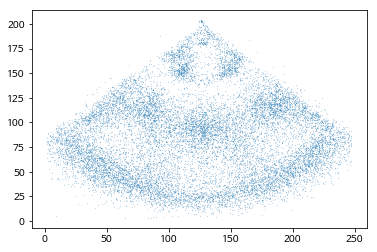

In [21]:
import matplotlib.pyplot as plt

plt.plot(hit.hc_x, hit.hc_y, 'o', ms=0.1)
plt.show

### 구종 별 투구 데이터의 수

In [22]:
FF = data[data.pitch_type == 'FF']
SI = data[data.pitch_type == 'SI']
CU = data[data.pitch_type == 'CU']

In [23]:
print(len(FF)+len(SI)+len(CU))

378449


### 구종 별 인플레이 타구의 수

In [25]:
import numpy as np
sum_FF = sum(np.diag(pd.crosstab(FF.bb_type, FF.bb_type)))
sum_SI = sum(np.diag(pd.crosstab(SI.bb_type, SI.bb_type)))
sum_CU = sum(np.diag(pd.crosstab(CU.bb_type, CU.bb_type)))

In [26]:
print(sum_FF+sum_SI+sum_CU)

63560


### 구종 별 인플레이 타구의 비율

In [27]:
pd.crosstab(CU.bb_type, CU.bb_type, normalize=True)

bb_type,fly_ball,ground_ball,line_drive,popup
bb_type,,,,
fly_ball,0.225532,0.000000,0.000000,0.000000
ground_ball,0.000000,0.472021,0.000000,0.000000
line_drive,0.000000,0.000000,0.242524,0.000000
popup,0.000000,0.000000,0.000000,0.059923


In [28]:
import numpy as np
prob_FF = np.diag(pd.crosstab(FF.bb_type, FF.bb_type, normalize=True))
prob_SI = np.diag(pd.crosstab(SI.bb_type, SI.bb_type, normalize=True))
prob_CU = np.diag(pd.crosstab(CU.bb_type, CU.bb_type, normalize=True))

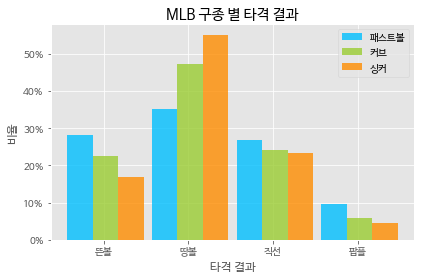

In [31]:
plt.style.use('ggplot')

fig, ax = plt.subplots()
index = np.arange(4)
bar_width = 0.3
opacity = 0.8
 
bar1 = plt.bar(index, prob_FF, bar_width,
alpha=opacity, color='deepskyblue',
label='패스트볼')

bar2 = plt.bar(index + bar_width, prob_CU, bar_width,
alpha=opacity, color='yellowgreen',
label='커브')

bar3 = plt.bar(index + bar_width + bar_width, prob_SI, bar_width,
alpha=opacity, color='darkorange',
label='싱커')


 
plt.xlabel('타격 결과')
plt.ylabel('비율')
plt.title('MLB 구종 별 타격 결과')
plt.xticks(index + 0.28, ('뜬볼', '땅볼', '직선', '팝플'))
plt.yticks((0, 0.1, 0.2, 0.3, 0.4, 0.5), ('0%', '10%', '20%', '30%', '40%', '50%'))
plt.legend()
 
plt.tight_layout()
plt.show()

### 최근 10년 간 땅볼 비율 최고 선수 (선수 중복 제외)

In [3]:
import pandas as pd
pitch = pd.read_csv('C://Users//JH//Desktop//pitch.csv')

In [43]:
GBsort = pitch.sort_values(by='pGB', ascending=False)[['Season', 'Name', 'pGB', 'pSI']].drop_duplicates(['Name'], keep='first').head(30)
GBsort['pSI'] = GBsort['pSI'] * 100
GBsort['pGB'] = GBsort['pGB'] * 100
GBsort.columns = ['연도', '선수명', '땅볼비율', '싱커비율']

In [44]:
GBsort

,연도,선수명,땅볼비율,싱커비율
1862,2016,Zach Britton,80.0,92.1
1194,2012,Brad Ziegler,75.5,83.6
1999,2017,Scott Alexander,73.8,93.4
1119,2011,Jonny Venters,72.5,68.6
1989,2017,Richard Bleier,68.8,56.6
1704,2015,Sam Dyson,68.8,54.7
2005,2017,T.J. McFarland,68.7,72.4
1432,2013,Seth Maness,68.4,61.7
1016,2010,Peter Moylan,67.8,65.5
1871,2017,Alex Claudio,67.5,56.3


### 구종 별 전체 타구 중 헛스윙 비율

In [33]:
FF_swing = len(FF[FF.description == 'swinging_strike_blocked']) + len(FF[FF.description == 'swinging_strike']) + len(FF[FF.description == 'missed_bunt']) + len(FF[FF.description == 'foul_tip'])
FF_swing / len(FF.description)

0.09617504152501591

In [34]:
SI_swing = len(SI[SI.description == 'swinging_strike_blocked']) + len(SI[SI.description == 'swinging_strike']) + len(SI[SI.description == 'missed_bunt']) + len(SI[SI.description == 'foul_tip'])
SI_swing / len(SI.description)

0.07203987112364076

In [35]:
CU_swing = len(CU[CU.description == 'swinging_strike_blocked']) + len(CU[CU.description == 'swinging_strike']) + len(CU[CU.description == 'missed_bunt']) + len(CU[CU.description == 'foul_tip'])
CU_swing / len(CU.description)

0.12776842483777642

### 구종 별 2스트라이크 이후 삼진 비율

In [36]:
strikes = data[data.strikes == 2]

In [37]:
FF2 = strikes[strikes.pitch_type == 'FF']
SI2 = strikes[strikes.pitch_type == 'SI']
CU2 = strikes[strikes.pitch_type == 'CU']

In [38]:
FF2_swing = len(FF2[FF2.description == 'swinging_strike_blocked']) + len(FF2[FF2.description == 'swinging_strike']) + len(FF2[FF2.description == 'missed_bunt']) + len(FF2[FF2.description == 'foul_tip']) + len(FF2[FF2.description == 'called_strike']) + len(FF2[FF2.description == 'foul_bunt']) + len(FF2[FF2.description == 'swinging_pitchout'])
FF2 = FF2_swing / len(FF2.description)

In [39]:
SI2_swing = len(SI2[SI2.description == 'swinging_strike_blocked']) + len(SI2[SI2.description == 'swinging_strike']) + len(SI2[SI2.description == 'missed_bunt']) + len(SI2[SI2.description == 'foul_tip']) + len(SI2[SI2.description == 'called_strike']) + len(SI2[SI2.description == 'foul_bunt']) + len(SI2[SI2.description == 'swinging_pitchout'])
SI2 = SI2_swing / len(SI2.description)

In [40]:
CU2_swing = len(CU2[CU2.description == 'swinging_strike_blocked']) + len(CU2[CU2.description == 'swinging_strike']) + len(CU2[CU2.description == 'missed_bunt']) + len(CU2[CU2.description == 'foul_tip']) + len(CU2[CU2.description == 'called_strike']) + len(CU2[CU2.description == 'foul_bunt']) + len(CU2[CU2.description == 'swinging_pitchout'])
CU2 = CU2_swing / len(CU2.description)

In [41]:
strikes2 = [FF2, SI2, CU2]

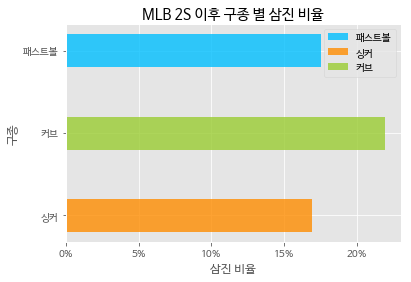

In [42]:
plt.style.use('ggplot')

fig, ax = plt.subplots()
index = np.arange(1)
bar_width = 0.2
opacity = 0.8
 
bar1 = plt.barh(index + 1, FF2, bar_width,
alpha=opacity, color='deepskyblue',
label='패스트볼')

bar2 = plt.barh(index, SI2, bar_width,
alpha=opacity, color='darkorange',
label='싱커')

bar3 = plt.barh(index + 0.5, CU2, bar_width,
alpha=opacity, color='yellowgreen',
label='커브')

plt.title('MLB 2S 이후 구종 별 삼진 비율')
plt.xlabel('삼진 비율')
plt.ylabel('구종')
plt.legend()
plt.yticks([1, 0.5, 0], ('패스트볼', '커브', '싱커'))
plt.xticks((0.00, 0.05, 0.10, 0.15, 0.20), ('0%', '5%', '10%', '15%', '20%'))
plt.show()

## 2. Fangraphs Data

- pitch.csv: 2009_2018 MLB 팬그래프닷컴 기준 규정 이닝 충족 투수(선발, 중계)
- pitch_sp.csv: 2009_2018 MLB 팬그래프닷컴 기준 규정 이닝 충족 투수(선발)
- pitch_rp.csv: 2009_2018 MLB 팬그래프닷컴 기준 규정 이닝 충족 투수(중계)

In [1]:
import pandas as pd
pitch = pd.read_csv('C://Users//JH//Desktop//pitch.csv')
#pitch = pd.read_csv('C://Users//JH//Desktop//pitch_sp.csv')
#pitch = pd.read_csv('C://Users//JH//Desktop//pitch_rp.csv')

In [2]:
pitch.head()

,Season,Name,Team,IP,pFA,pFC,pFS,pSI,pCH,pSL,...,HR/9,BABIP,pLOB,pGB,HR/FB,ERA,FIP,xFIP,WAR,playerid.1
0,2009,A.J. Burnett,Yankees,207.0,0.475,NaN,NaN,0.179,0.034,NaN,...,1.09,0.295,0.759,0.428,0.108,4.04,4.33,4.23,3.0,512
1,2009,Aaron Harang,Reds,162.1,0.536,NaN,NaN,0.148,0.033,0.224,...,1.33,0.331,0.757,0.349,0.117,4.21,4.14,3.88,2.6,1451
2,2009,Adam Wainwright,Cardinals,233.0,0.010,0.194,NaN,0.490,0.068,NaN,...,0.66,0.296,0.804,0.507,0.083,2.63,3.11,3.32,5.7,2233
3,2009,Andy Pettitte,Yankees,194.2,0.366,0.181,NaN,0.217,0.101,NaN,...,0.92,0.295,0.702,0.429,0.089,4.16,4.15,4.32,3.4,840
4,2009,Barry Zito,Giants,192.0,0.313,NaN,NaN,0.180,0.139,0.189,...,0.98,0.285,0.750,0.379,0.095,4.03,4.31,4.40,2.1,944


### 투수 별로 던지는 구종의 개수 파악

- pitch_per로 카운트 할 구종 최소 비율 정함

In [3]:
import numpy as np
pitch_name = pitch.columns[4:14]
pitch_num = len(pitch)
pitch_per = 0.1

pitch_type = []
for i in range(pitch_num):
    z = 0
    for j in pitch_name:
        if np.isnan(pitch.loc[i]['{}'.format(j)]) == False and pitch.loc[i]["{}".format(j)] >= pitch_per:
            z += 1
    pitch_type.append(z)

In [4]:
pitch['pitch_type'] = pitch_type

In [5]:
pd.crosstab(pitch.pitch_type, pitch.pitch_type)

pitch_type,1,2,3,4,5,6
pitch_type,,,,,,
1,36,0,0,0,0,0
2,0,611,0,0,0,0
3,0,0,890,0,0,0
4,0,0,0,524,0,0
5,0,0,0,0,109,0
6,0,0,0,0,0,1


### 구종 가치의 평균 구하기

In [6]:
pitch_val_sum = []
for i in range(pitch_num):
    z = pitch.loc[i]['wFA':'wSB'].sum()
    pitch_val_sum.append(z)

In [7]:
pitch['pitch_val_sum'] = pitch_val_sum

In [8]:
pitch.head()

,Season,Name,Team,IP,pFA,pFC,pFS,pSI,pCH,pSL,...,pLOB,pGB,HR/FB,ERA,FIP,xFIP,WAR,playerid.1,pitch_type,pitch_val_sum
0,2009,A.J. Burnett,Yankees,207.0,0.475,NaN,NaN,0.179,0.034,NaN,...,0.759,0.428,0.108,4.04,4.33,4.23,3.0,512,3,2.0
1,2009,Aaron Harang,Reds,162.1,0.536,NaN,NaN,0.148,0.033,0.224,...,0.757,0.349,0.117,4.21,4.14,3.88,2.6,1451,3,-7.1
2,2009,Adam Wainwright,Cardinals,233.0,0.010,0.194,NaN,0.490,0.068,NaN,...,0.804,0.507,0.083,2.63,3.11,3.32,5.7,2233,3,27.7
3,2009,Andy Pettitte,Yankees,194.2,0.366,0.181,NaN,0.217,0.101,NaN,...,0.702,0.429,0.089,4.16,4.15,4.32,3.4,840,5,4.1
4,2009,Barry Zito,Giants,192.0,0.313,NaN,NaN,0.180,0.139,0.189,...,0.750,0.379,0.095,4.03,4.31,4.40,2.1,944,5,10.0


### 각 구종 별 구종 가치 평균 구하기 (pitch_per = 0)

In [9]:
stat = 'pitch_val_sum'
#stat = 'WAR'
#stat = 'FIP'
#stat = 'ERA'
#stat = 'xFIP'
pitch_all = pitch.groupby('pitch_type')[stat].mean()
#pitch_sp = pitch.groupby('pitch_type')[stat].mean()
#pitch_rp = pitch.groupby('pitch_type')[stat].mean()

### 전체 투수

In [10]:
pitch_all

pitch_type
1    11.583333
2     6.915385
3     6.904944
4     7.104389
5     5.363303
6     6.200000
Name: pitch_val_sum, dtype: float64

### 선발 투수

In [187]:
pitch_sp

pitch_type
1    4.220000
2    3.937419
3    3.831538
4    3.860404
5    3.900659
6    3.840000
Name: xFIP, dtype: float64

### 중간 계투

In [176]:
pitch_rp

pitch_type
1    3.378387
2    3.608470
3    3.823477
4    3.901188
5    4.228333
Name: xFIP, dtype: float64

### DBSCAN

Text(0, 0.5, '구종 가치 평균')

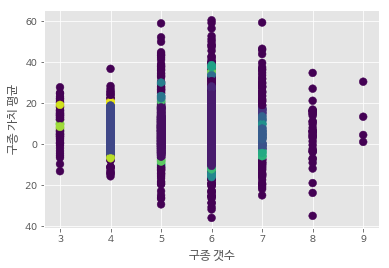

In [702]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X = np.array(pitch[['pitch_type', 'pitch_val_sum']])

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=clusters, s=60)
plt.xlabel("구종 갯수")
plt.ylabel("구종 가치 평균")

### k-Means

In [703]:
from sklearn.cluster import KMeans
import mglearn
X = np.array(pitch[['pitch_type', 'pitch_val_sum']])
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

Text(0, 0.5, '구종 가치 평균')

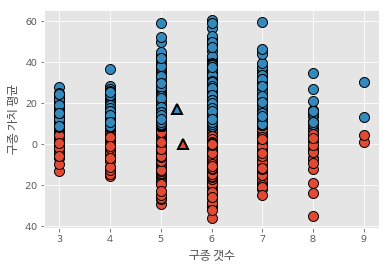

In [704]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1],
    markers='^', markeredgewidth=2)
plt.xlabel("구종 갯수")
plt.ylabel("구종 가치 평균")

### t-SNE

Text(0, 0.5, '구종 가치 평균 특성')

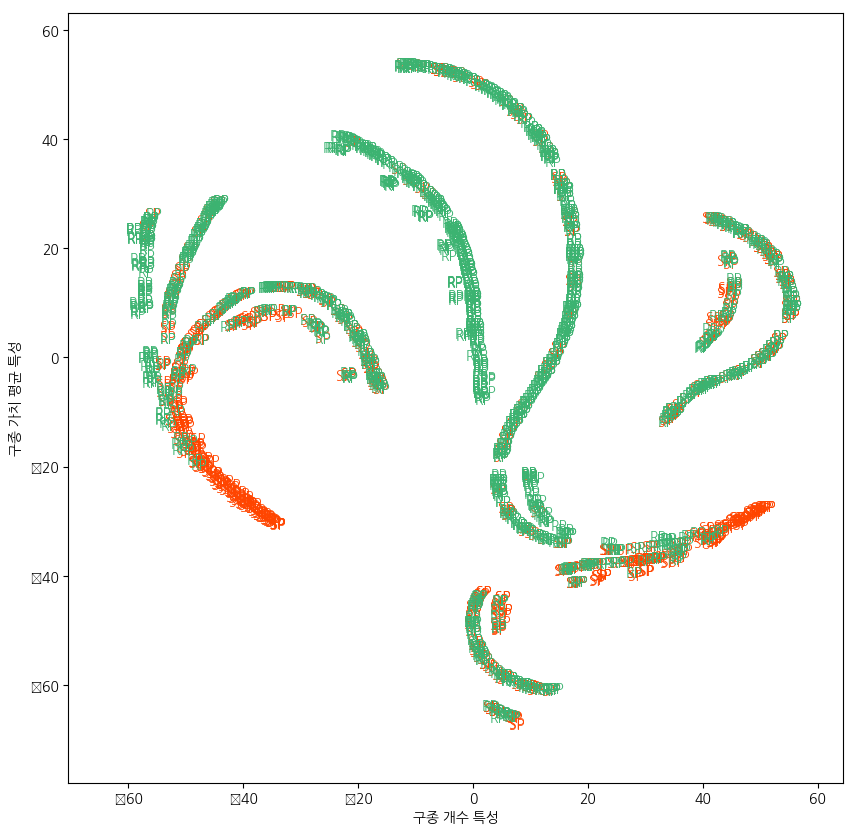

In [1129]:
plt.style.use('default')
plt.rcParams["font.family"] = 'NanumGothic'

from sklearn.manifold import TSNE
tsne = TSNE(random_state=0)
X = np.array(pitch[['pitch_type', 'pitch_val_sum']])
y = np.array(pitch['SP_RP'])
gu_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 10))
plt.xlim(gu_tsne[:, 0].min() - 10, gu_tsne[:, 0].max() + 10)
plt.ylim(gu_tsne[:, 1].min() - 10, gu_tsne[:, 1].max() + 10)

for i in range(len(gu_tsne)):
    if y[i] == "SP":
        color = "orangered"
    else:
        color = "mediumseagreen"
    plt.text(gu_tsne[i, 0], gu_tsne[i, 1], str(y[i]),
             color = color,
             fontdict={
                 #'weight': 'bold',
                 'size': 10})
plt.xlabel("구종 개수 특성")
plt.ylabel("구종 가치 평균 특성")

### PCA

Text(0, 0.5, '구종 가치 평균 특성')

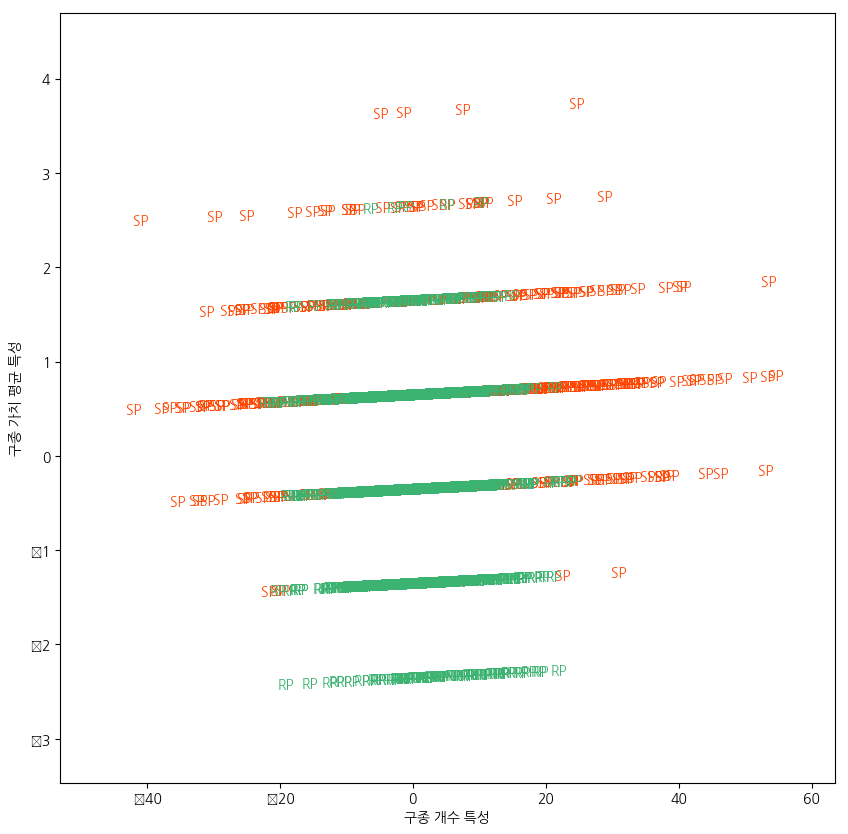

In [1131]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = np.array(pitch[['pitch_type', 'pitch_val_sum']])
y = np.array(pitch['SP_RP'])
pca.fit(X)
gu_pca = pca.transform(X)

plt.figure(figsize=(10, 10))
plt.xlim(gu_pca[:, 0].min() - 10, gu_pca[:, 0].max() + 10)
plt.ylim(gu_pca[:, 1].min() - 1, gu_pca[:, 1].max() + 1)

for i in range(len(gu_pca)):
    if y[i] == "SP":
        color = "orangered"
    else:
        color = "mediumseagreen"
    plt.text(gu_pca[i, 0], gu_pca[i, 1], str(y[i]),
             color = color,
             fontdict={
                 #'weight': 'bold',
                 'size': 10})
plt.xlabel("구종 개수 특성")
plt.ylabel("구종 가치 평균 특성")

### NMF

In [1132]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = np.array(pitch[['pitch_type', 'pitch_val_sum']])
y = np.array(pitch['SP_RP'])
scaler.fit(X)
X_scaled = scaler.transform(X)

Text(0, 0.5, '구종 가치 평균 특성')

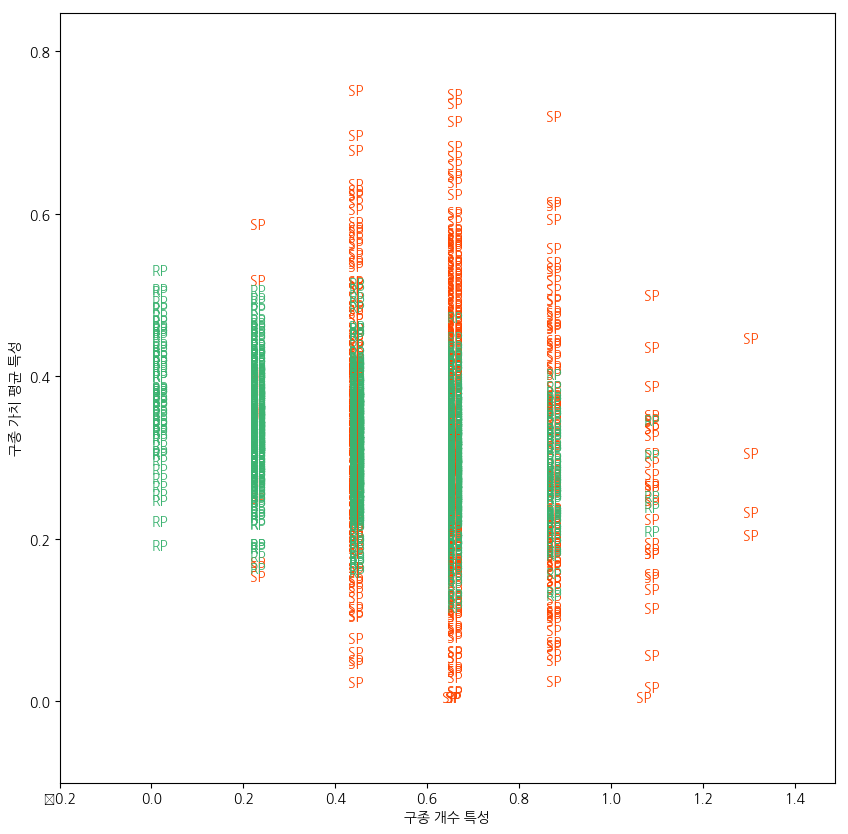

In [1133]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, random_state=0)
gu_nmf = nmf.fit_transform(X_scaled)

plt.figure(figsize=(10, 10))
plt.xlim(gu_nmf[:, 0].min() - 0.2, gu_nmf[:, 0].max() + 0.2)
plt.ylim(gu_nmf[:, 1].min() - 0.1, gu_nmf[:, 1].max() + 0.1)

for i in range(len(gu_nmf)):
    if y[i] == "SP":
        color = "orangered"
    else:
        color = "mediumseagreen"
    plt.text(gu_nmf[i, 0], gu_nmf[i, 1], str(y[i]),
             color = color,
             fontdict={
                 #'weight': 'bold',
                 'size': 10})
plt.xlabel("구종 개수 특성")
plt.ylabel("구종 가치 평균 특성")

### plotly 패키지 이용 구종 구사 비율 pdf

In [868]:
x1 = pitch['pFA'].dropna()
x1 = x1[x1 >= 0.1] + 1.5
x2 = pitch['pCU'].dropna()
x2 = x2[x2 >= 0.1] + 0.4
x3 = pitch['pSI'].dropna() 
x3 = x3[x3 >= 0.1] + 0.8
x4 = pitch['pCH'].dropna()
x4 = x4[x4 >= 0.1]

In [869]:
import plotly 
plotly.tools.set_credentials_file(username='skz2356', api_key='0nfpx0OY27rYShN7OZAl')

import plotly.plotly as py
import plotly.figure_factory as ff

hist_data = [x1, x3, x2, x4]

group_labels = ['패스트볼', '싱커', '커브', '체인지업']

fig = ff.create_distplot(hist_data, group_labels, bin_size=0.01)

py.iplot(fig, file_name="gu")

C:\Users\JH\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### 각 구종 별 구종 가치 평균 구하기 (pitch_per = 0.1)

### 전체 투수

In [12]:
all = pd.concat([pd.Series(list(pitch_all.index)), pd.Series(list(pitch_all))], axis=1).round(2)
all.columns = ['구종개수', '구종가치합평균']
all

,구종개수,구종가치합평균
0,1,11.58
1,2,6.92
2,3,6.90
3,4,7.10
4,5,5.36
5,6,6.20


### 선발 투수

In [188]:
sp = pd.concat([pd.Series(list(pitch_sp.index)), pd.Series(list(pitch_sp))], axis=1).round(2)
sp.columns = ['구종개수', '구종가치평균']
sp = sp.iloc[:5]
sp

,구종개수,구종가치평균
0,1,4.22
1,2,3.94
2,3,3.83
3,4,3.86
4,5,3.90


### 중간 계투

In [177]:
rp = pd.concat([pd.Series(list(pitch_rp.index)), pd.Series(list(pitch_rp))], axis=1).round(2)
rp.columns = ['구종개수', '구종가치평균']
rp

,구종개수,구종가치평균
0,1,3.38
1,2,3.61
2,3,3.82
3,4,3.90
4,5,4.23


### plotly 패키지 이용 선발 투수-중간 계투 간 적절 구종 개수 비교

In [189]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='skz2356', api_key='TUlKoDXBxpyOo8wNczqG')

x = [1, 2, 3, 4, 5]
x1 = [0.8, 1.8, 2.8, 3.8, 4.8]
x2 = [1.2, 2.2, 3.2, 4.2, 5.2]
y = sp['구종가치평균']
y2 = rp['구종가치평균']

trace1 = go.Bar(
    x=x,
    y=y,
    text=y,
    textposition = 'auto',
    name='선발',
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.6
)

trace2 = go.Bar(
    x=x,
    y=y2,
    text=y2,
    textposition = 'auto',
    name='중계',
    marker=dict(
        color='rgb(58,200,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.6
)

trace3 = go.Scatter(
    x = x1,
    y = y
)

trace4 = go.Scatter(
    x = x2,
    y = y2
)

ylim = [3, 4.5]
layout = dict(
    yaxis={
        'range': ylim
    },
    shapes=[
        # Line reference to the axes
        {
            'type': 'line',
            'xref': 'x',
            'yref': 'y',
            'x0': 1,
            'y0': 3.38,
            'x1': 1.4,
            'y1': 3.38,
            'line': {
                'color': 'red',
                'width': 7,
            },
        },
        # Line reference to the plot
        {
            'type': 'line',
            'xref': 'x',
            'yref': 'y',
            'x0': 2.6,
            'y0': 3.83,
            'x1': 3,
            'y1': 3.83,
            'line': {
                'color': 'red',
                'width': 7,
            }
        }
    ]
)

data = [trace1, trace2, trace3, trace4]

fig = {
    'data': data,
    'layout': layout,
}
        
py.iplot(fig, filename='SP-RP Pitch Value xFIP')

## 더 알아볼 것

### 원-피치 선발 투수

In [37]:
pitch[pitch.pitch_type == 1]

,Season,Name,Team,IP,pFA,pFC,pFS,pSI,pCH,pSL,...,O-Swing,Z-Swing,Swing,O-Contact,Z-Contact,Contact,Zone,Pace,pitch_type,pitch_val_sum
322,2012,R.A. Dickey,Mets,232.2,0.037,NaN,NaN,0.098,0.011,NaN,...,0.336,0.638,0.500,0.669,0.790,0.753,0.542,18.4,1,34.6
405,2013,R.A. Dickey,Blue Jays,224.2,0.058,NaN,NaN,0.048,0.005,NaN,...,0.280,0.643,0.470,0.728,0.831,0.801,0.524,18.6,1,-3.4
485,2014,R.A. Dickey,Blue Jays,215.2,0.060,NaN,NaN,0.050,0.001,NaN,...,0.281,0.637,0.465,0.708,0.805,0.777,0.516,18.7,1,-1.2
568,2015,R.A. Dickey,Blue Jays,214.1,0.055,NaN,NaN,0.044,0.006,NaN,...,0.304,0.679,0.492,0.760,0.839,0.815,0.500,18.6,1,6.8
645,2016,R.A. Dickey,Blue Jays,169.1,0.020,NaN,NaN,0.092,0.012,NaN,...,0.291,0.676,0.478,0.726,0.803,0.779,0.487,19.1,1,-5.4


### 6-피치 선발 투수

In [64]:
pitch[pitch.pitch_type == 6].groupby('Name')['pitch_val_sum'].mean()

Name
Paul Maholm    6.2
Name: pitch_val_sum, dtype: float64

### 원-피치 중간 계투

In [51]:
pitch[pitch.pitch_type == 1].groupby('Name')['pitch_val_sum'].mean()

Name
Brad Ziegler         19.700000
Brandon Kintzler      0.300000
Danys Baez           11.100000
David Aardsma        15.600000
Ernesto Frieri       12.900000
Jake McGee            6.950000
James Pazos           4.600000
Jonathan Papelbon    11.200000
Kenley Jansen        19.640000
Mariano Rivera       18.400000
Mark DiFelice         5.000000
Matt Thornton         4.500000
Ronald Belisario     15.400000
Ryan Buchter         11.600000
Scott Alexander      12.500000
Sean Doolittle       15.050000
Sean White            9.300000
Tony Cingrani         2.400000
Zach Britton         21.033333
Name: pitch_val_sum, dtype: float64

In [52]:
len(pitch[pitch.pitch_type == 1].groupby('Name')['pitch_val_sum'].mean())

19

### 5-피치 중간 계투

In [53]:
pitch[pitch.pitch_type == 5].groupby('Name')['pitch_val_sum'].mean()

Name
Adam Warren          -3.6
Alfredo Aceves       -2.2
Alfredo Simon        -1.9
Brett Cecil           4.0
Brian Duensing        8.2
Brian Tallet        -12.7
Carlos Villanueva   -11.8
Casey Janssen        -1.4
Chan Ho Park         -1.4
Daniel Herrera        1.9
Dillon Gee            2.4
Eddie Bonine         -6.3
Eddie Butler        -12.4
Jace Fry              9.6
James Russell         5.2
Mike Montgomery      12.3
Tom Wilhelmsen        5.0
Name: pitch_val_sum, dtype: float64

In [54]:
len(pitch[pitch.pitch_type == 5].groupby('Name')['pitch_val_sum'].mean())

17